## Escola Piloto Virtual - PEQ/COPPE/UFRJ

## Data Science e Machine Learning na Prática - Introdução e Aplicações na Indústria de Processos

Este notebook é referente à Aula 1 do curso, que trata de técnicas de regressão utilizando modelos de florestas aleatórias.

In [ ]:
# comandos mágicos que não se comunicam com a linguagem Python e sim diretamente com o kernel do Jupyter
# começam com %

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
# importando os principais módulos que usaremos ao longo da aula

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

# você também pode importar apenas uma parte de cada módulo, por exemplo:
# from sklearn.ensemble import RandomForestRegressor()

# Um exemplinho introdutório...

O objeto de estudo deste notebook é o conjunto de dados da competição [Bluebook for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers), que pode ser traduzida livremente como "*Tabela FIPE para Tratores de Esteira*". Antes de começarmos a analisar esses dados, no entanto, vamos usar um exemplo mais simples, o conjunto [Boston Housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), para nos familiarizarmos com a funcionalidade básica da regressão com o [scikit-learn](https://scikit-learn.org/stable/).

### Importando dados


O conjunto de dados em questão é disponibilizado no próprio [scikit-learn](https://scikit-learn.org/stable/) em seu módulo [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) e pode ser importado com o seguinte comando:

In [ ]:
boston = sklearn.datasets.load_boston()
boston

O objeto **boston** possui vários elementos: 

* data;
* target;
* feature_names;
* DESCR;
* filename.

Imprimindo a descrição (DESCR):

In [ ]:
print(boston.DESCR)

As variáveis preditoras e predita estão armazenadas no objeto **boston** em seus elementos **data** e **target**, respectivamente. Vamos dar a elas nomes mais simpáticos:

In [ ]:
X, y = boston.data, boston.target

### Separando conjuntos de treino e de teste

No Aprendizado de Máquina, não é boa prática utilizar na etapa de treino todos os dados disponíveis. Sempre deve-se reservar uma parcela dos dados para efetuar um teste, de modo a verificar-se a capacidade preditiva do modelo.

Para efetuar a separação dos dados Boston em *dados de treino* e *dados de teste*, usaremos a função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, 
                                                                            test_size = 0.1, 
                                                                            random_state = 0)

A função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) separa os dados em *treino* e *teste* de maneira aleatória. No caso acima, uma fração de 10% dos dados é reservada para teste.

A estratégia de separação aleatória é adequada quando os dados são independentes e identicamente distribuídos; em situações em que isso não vale (por exemplo, quando há dependências temporais), devemos usar outras estratégias.

Obs: o argumento **random_state** especifica a semente de geração de pseudo-aleatoriedade do algoritmo; isso faz com que em todas as execuções os resultados sejam sempre os mesmos.

### Treinando o modelo

Nosso modelo de regressão será o [modelo de florestas aleatórias](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Vamos importá-lo do [scikit-learn](https://scikit-learn.org/), armazenando-o em um objeto chamado **m** (poderia ser qualquer outro nome):

In [ ]:
m = sklearn.ensemble.RandomForestRegressor()

Não se preocupe, você já vai entender como esse modelo funciona! Antes disso, vamos treiná-lo. 

De modo a treinar um modelo no [scikit-learn](https://scikit-learn.org/), devemos fornecer os valores de X e y ao método **fit**, contido no modelo:

In [ ]:
m.fit(X_train, y_train)

Pronto! Nosso modelo está treinado! Fácil, né?

Vamos calcular as predições do modelo para o conjunto de teste. Para isso, usa-se o método **predict**:

In [ ]:
y_test_pred = m.predict(X_test)

Para visualizar o resultado, plotaremos um gráfico com os valores verdadeiros no eixo $x$ e as predições no eixo $y$. Como o objetivo é que as predições estejam o mais perto possível dos valores verdadeiros, quanto mais esses pontos se aproximarem da reta $x=y$, melhores as predições!

In [ ]:
# plotando valores verdadeiros contra predições
plt.plot(y_test, y_test_pred,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('y_test')
plt.ylabel('y_test_pred');

Atenção: a reta da figura acima *não* é o modelo! É apenas a reta $x=y$. Não poderíamos visualizar o modelo no plano cartesiano, já que ele é multidimensional. Além do mais, como veremos a seguir, o modelo de florestas aleatórias é não-linear, portanto não assumiria a forma de uma reta.

Calculando algumas métricas de desempenho:

In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)
r2 = sklearn.metrics.r2_score(y_test, y_test_pred)

print(f'MAE: {mae}')
print(f'R2: {r2}')

A primeira métrica é o [erro absoluto médio](https://en.wikipedia.org/wiki/Mean_absolute_error) e corresponde à média dos módulos das distâncias entre os valores verdadeiros e os valores preditos. Quanto menor, melhor.

A segunda métrica é o [coeficiente de determinação](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$, uma medida da variância dos dados explicada pelo modelo. Pode variar de $-\infty$ a 1; quanto mais perto de 1, melhor ($R^2 = 0$ implica que o desempenho do modelo é equivalente a usar a média dos dados; valores negativos implicam que o modelo é pior que isso).

Essas são apenas algumas das métricas; existem várias [outras](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation); a escolha de qual usar deve ser ditada pelo problema que se está resolvendo.

***Mão na massa 1!***

* Na primeira célula:
    * Procure na [API](https://scikit-learn.org/stable/modules/classes.html) ou no [guia do usuário](https://scikit-learn.org/stable/user_guide.html#) do [scikit-learn](https://scikit-learn.org/) outro modelo e outras métricas para avaliação de resultados de regressão e as utilize para reproduzir os passos acima. Dependendo da sua escolha, talvez seja necessário importar novos módulos do [scikit-learn](https://scikit-learn.org/), como fiz no começo do notebook.
* Na segunda célula:
    * Repita todo o procedimento para o conjunto de dados *diabetes*, também disponível no [scikit-learn](https://scikit-learn.org/) (procure-o [aqui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)).

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
from sklearn import linear_model

boston = sklearn.datasets.load_boston()
boston
print(boston.DESCR)
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state = 0)

# Usei o modelo linear_model.Ridge do sklearn:
m = linear_model.Ridge(alpha=.5)
m.fit(X_train, y_train)
y_test_pred = m.predict(X_test)

# Plotando a reta como ensinado anteriormente:
plt.plot(y_test, y_test_pred,'.')
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())
plt.xlabel('y_test')
plt.ylabel('y_test_pred');

# Calculando as mêtricas de desempenho MAE e R2: 
mae = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)
r2 = sklearn.metrics.r2_score(y_test, y_test_pred)

print(f'MAE: {mae}')
print(f'R2: {r2}')


**Analisando e comparando os resultados:**

Observa-se um valor maior do MAE e um valor menor do R2 no modelo **linear_model.Ridge** quando comparados com os valores MAE e R2 no modelo **RandomForestRegressor** (MAE: 3.916420145879341 e R2: 0.50785603183987 no modelo **linear_model.Ridge** contra MAE: 2.5721568627451 e R2: 0.7083032970846119 no modelo **RandomForestRegressor**, o qual significa que o modelo **RandomForestRegressor** teve um melhor desempenho (quanto maior o valor do MAE e o valor do R2 mais próximo de 1[](http://), melhor a predição do modelo).

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

diabetes = sklearn.datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state = 0)

m = sklearn.ensemble.RandomForestRegressor()
m.fit(X_train, y_train)
y_test_pred = m.predict(X_test)

# plotando valores verdadeiros contra predições
plt.plot(y_test, y_test_pred,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('y_test')
plt.ylabel('y_test_pred');

mae = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)
r2 = sklearn.metrics.r2_score(y_test, y_test_pred)

print(f'MAE: {mae}')
print(f'R2: {r2}')

**Analisando e comparando os resultados:**

Ao trocar o tipo de dataset mantendo o modelo de regressão utlizado inicialmente, observa-se uma distribuição dos dados mais espalhada que a análise anterior dificultando o gráfico da regressão linear, o qual pode ser verificado pelo valor baixo do R2 (~0.28).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
from sklearn import linear_model

diabetes = sklearn.datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state = 0)

# Usei o modelo linear_model.Ridge do sklearn:
m = linear_model.Ridge(alpha=.5)
m.fit(X_train, y_train)
y_test_pred = m.predict(X_test)

# plotando valores verdadeiros contra predições
plt.plot(y_test, y_test_pred,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('y_test')
plt.ylabel('y_test_pred');

mae = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)
r2 = sklearn.metrics.r2_score(y_test, y_test_pred)

print(f'MAE: {mae}')
print(f'R2: {r2}')

Nosso exemplo foi simples, mas o suficiente para motivar várias perguntas:

* Como entender melhor a natureza dos dados?
* O que se deve fazer quando há problemas nos dados (buracos, outliers, etc)?
* Mesmo que os dados não tenham problemas, é possível mexer neles antes de entregá-los ao modelo de florestas aleatórias, de modo a melhorar os resultados? Como?
* O que são as tais florestas que compõem o modelo?
* É possível mexer nas florestas de modo a melhorar os resultados? Como?
* Se a estratégia de separação treino/teste usada acima não for adequada, que outras estratégias podemos adotar?
* O que fazer se o conjunto de dados for muito grande, tornando o treino exageradamente demorado?
* É possível interpretar os resultados?


Vamos responder a todas elas ao longo desta aula!!

# Tabela FIPE para Tratores de Esteira :D

O conjunto de dados analisado nesta aula, retirado da competição  [Bluebook for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers), consiste de dados reais relativos a informações variadas acerca de tratores de esteira industriais. Nosso objetivo é criar um modelo que, dadas informações relativas a um trator em particular, seja capaz de predizer seu *preço de venda em leilões*.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1e/CAT-D10N-pic001.jpg" width="600" height="600"/>

A abordagem aqui apresentada é baseada na solução proposta por Jeremy Howard em seu excelente curso [Introduction to Machine Learning for Coders](http://course18.fast.ai/ml).

# Importando dados

O primeiro passo é importar os dados de treino. Como os arquivos estão armazenados no formato [CSV (comma-separated values)](https://pt.wikipedia.org/wiki/Comma-separated_values), utilizamos a função [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), da biblioteca [pandas](https://pandas.pydata.org/), para efetuar a leitura:

In [ ]:
PATH = "../input/bluebook-for-bulldozers/"

df_raw = pd.read_csv(f'{PATH}Train.zip',
                     compression='zip', 
                     low_memory=False, 
                     parse_dates=["saledate"])

Alguns parâmetros foram fornecidos à função: 

* **compression** especificou que os arquivos estão comprimidos no formato *zip*;
* **low_memory** especificou que a função deve ler o arquivo como um todo e não em pequenos pedaços (isso é recomendável quando não sabemos bem que tipos de variáveis há no arquivo, por conta de uma questão técnica relacionada à forma como o [pandas](https://pandas.pydata.org/) infere os tipos de cada variável); 
* **parse_dates** especifica qual variável deve ser processada como data (no caso, no formato ano-mês-dia).

Conferindo o tamanho do conjunto:

In [ ]:
df_raw.shape

São 53 variáveis e quase meio milhão de observações!

Visualizando algumas linhas do conjunto e utilizando o método [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) para calcular algumas medidas estatísticas:

In [ ]:
with pd.option_context("display.max_columns", 100): 
    display(df_raw)
    display(df_raw.describe(include='all'))

Parece que há [variáveis categóricas](https://en.wikipedia.org/wiki/Categorical_variable) e [valores faltantes](https://en.wikipedia.org/wiki/Missing_data) no conjunto de dados.

Para analisar quais variáveis são numéricas e quais são categóricas, daremos uma olhada em seus tipos:

In [ ]:
df_raw.dtypes

As váriaveis não-numéricas são interpretadas pelo [pandas](https://pandas.pydata.org/) como sendo do tipo genérico **object**. Nota-se acima que são a grande maioria!

Vamos analisar quantas e quais são as categorias em cada variável categórica. No output abaixo, cada linha contém o nome de uma variável, o número de categorias entre parênteses e as categorias em si entre colchetes.

In [ ]:
for n, c in df_raw.items():
    if not pd.api.types.is_numeric_dtype(c) and not pd.api.types.is_datetime64_any_dtype(c):
        print(f'{n} ({len(c.unique())}): {c.unique()}')

Há variáveis de alta cardinalidade: por exemplo, **fiModelDesc** tem 4999 valores possíveis!

Usando a biblioteca [missingno](https://github.com/ResidentMario/missingno) para dar uma olhada nos valores faltantes:

In [ ]:
# para poder importar módulos que não estejam nos kernels do kaggle, 
# devemos instalá-los com o pip

!pip install missingno

In [ ]:
import missingno

missingno.bar(df_raw)
missingno.matrix(df_raw);

Há uma grande proporção de valores faltantes, a maioria deles nas variáveis categóricas (todas além das oito primeiras).

O fato de haver variáveis categóricas e valores faltantes é crítico, já que algoritmos de regressão são projetados para lidar com variáveis numéricas. Portanto, é preciso pré-processar os dados e transformá-los em uma matriz de números antes de efetuar treinos de modelos de aprendizado.

# Pré-processamento dos dados

A primeira etapa de pré-processamento será aplicar a função logaritmo à variável predita:

In [ ]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

Esse procedimento não é necessário, apenas conveniente. Ele é muito comum na predição de preços, já que nesses casos nos importamos mais com proporções do que com diferenças absolutas. Por exemplo, muitas vezes é mais significativo predizer um aumento ou redução de 10% (proporção) do que de 10 reais (diferença absoluta). Ao aplicar o logaritmo, os dados são transpostos para a escala logarítmica, em que as proporções se transformam em diferenças absolutas.

Vamos encapsular o restante de nosso procedimento de pré-processamento em uma função:

In [ ]:
def pre_process (df):
    
    new_df = pd.DataFrame()
    
    for n,c in df.items():
                
        if pd.api.types.is_numeric_dtype(c):
            # substituindo NaN numericos pelas medianas de cada coluna
            new_df[n] = c.fillna(value=c.median())
        else:
            # interpretando o que nao for numerico como variaveis categoricas 
            # e transformando cada categoria em um numero
            new_df[n] = pd.Categorical(c.astype('category').cat.as_ordered()).codes
    
    return new_df     

Na função acima, iteramos ao longo de todas as colunas do conjunto de dados. Se a coluna em questão for numérica, os valores faltantes são substituídos pela mediana. Se não for numérica, são transformadas em categorias e cada categoria, por sua vez, é associada a um número.

Valores faltantes nas váriaveis categóricas não são tão graves porque o próprio fato de um valor estar faltando pode ser interpretado como uma categoria. Já nas variáveis numéricas, eles são críticos, por isso foi preciso substitui-los por algum número.

Aplicando a função acima e gerando o [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) processado:

In [ ]:
df_proc = pre_process(df_raw)

Separando o conjunto em X (variáveis preditoras) e y (variável predita):

In [ ]:
X, y = df_proc.drop('SalePrice', axis=1), df_proc['SalePrice']

Separando o conjunto em duas partes, o treino e a validação:

In [ ]:
n_valid = 12000
n_trn = len(df_proc)-n_valid

X_treino, X_validacao = X[:n_trn].copy(), X[n_trn:].copy()
y_treino, y_validacao = y[:n_trn].copy(), y[n_trn:].copy()

y_treino.shape, y_validacao.shape

O conjunto de validação é um conjunto usado para testes intermediários durante o processo de modelagem. Além da validação, é recomendável que haja um conjunto de teste em separado para ser usado *após* a finalização da modelagem. Todas as competições do Kaggle possuem esse conjunto, que é usado para criar as pontuações e leaderboards.

Perceba que, como há *evolução temporal*, não separamos o treino e o teste de maneira aleatória, como fizemos no exemplo introdutório. Agora retiramos as 12000 últimas observações para teste, o que faz sentido, pois na vida real um modelo é aplicado para prever valores em instantes de tempo posteriores aos usados no treino.

# Treinando a primeira floresta

Para poupar tempo, vamos definir uma função, chamada **display_score**, que aceita um modelo treinado e imprime na tela as métricas $R^2$ e [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) relativas ao treino e à validação:

In [ ]:
def rmse(x,y): 
    
    return np.sqrt(sklearn.metrics.mean_squared_error(x,y))

def display_score(m):
    
    res = [[rmse(m.predict(X_treino), y_treino), m.score(X_treino, y_treino)],
          [rmse(m.predict(X_validacao), y_validacao), m.score(X_validacao, y_validacao)]]
    
    score = pd.DataFrame(res, columns=['RMSE','R2'], index = ['Treino','Validação'])
    
    if hasattr(m, 'oob_score_'): 
        score.loc['OOB'] = [rmse(y_treino, m.oob_prediction_), m.oob_score_]
        
    display(score)

A célula abaixo treina um modelo de florestas aleatórias que especificaremos como o *modelo base*:

In [ ]:
m_base = sklearn.ensemble.RandomForestRegressor(n_jobs=-1, oob_score = True, random_state = 0)
%time m_base.fit(X_treino, y_treino)
display_score(m_base)

Explicando as três linhas acima:

* na primeira linha, definimos o modelo. O hiperparâmetro **n_jobs = -1** especifica que, caso haja múltiplos processadores no computador, todos devem ser usados em paralelo. O hiperparâmetro **oob_score** será explicado mais adiante.

* na segunda linha, treinamos o modelo. Repare no uso do comando mágico %time, que mede o tempo necessário para essa tarefa.

* na terceira linha, usamos a função **display_score**, definida anteriormente, para imprimir as métricas.

Os resultados são bem satisfatórios! O $R^2$ é próximo de 1 e, analisando o [leaderboard da competição](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard), nosso RMSE está no mesmo patamar do top 20! De fato, o modelo de florestas aleatórias é excelente para resolver esse tipo de problema: com alto grau de não-linearidade, dados sem estrutura clara e grande número de variáveis categóricas.

A partir de agora, concentraremos nossos esforços em:

* entender como funciona o modelo;
* utilizar algumas técnicas para melhorar os resultados.

# O que é uma floresta aleatória, afinal?

Florestas, obviamente, são feitas de árvores!

Em particular, os modelos de florestas aleatórias são compostos por vários modelos mais simples conhecidos como *árvores de decisão*.

Portanto, antes de entender a floresta, é preciso entender a árvore.

## Treinando e visualizando uma árvore de decisão

Na nomenclatura do [scikit-learn](https://scikit-learn.org/stable/), cada árvore é chamada de *estimador*. Para treinar apenas 1 árvore, portanto, podemos fornecer o hiperparâmetro **n_estimators=1** para o modelo:

In [ ]:
m = sklearn.ensemble.RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1, random_state = 0)
%time m.fit(X_treino, y_treino)
display_score(m)

Os resultados são bem piores do que antes! Usar a floresta ao invés de 1 só árvore parece fazer toda a diferença. Outro detalhe: o treinamento ocorre de forma bem mais rápida.

A seguir, define-se uma função para visualizar uma árvore:

In [ ]:
def draw_tree(t, df, size=10, ratio=1, precision=0):
   
    import re
    import graphviz
    import sklearn.tree
    import IPython.display
    
    s=sklearn.tree.export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                                   special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

Utilizando-a para visualizar a árvore recém-treinada:

In [ ]:
draw_tree(m.estimators_[0], X_treino, precision=3)

Uma árvore é uma sequência de decisões binárias. Cada quadradinho acima é um *nó* e representa uma porção dos dados. O primeiro nó é chamado de *raiz* e contém a totalidade dos dados. Os últimos nós são chamados de *folhas*. Cada nó é gerado a partir de um nó da camada anterior por meio de uma decisão correspondente a alguma variável. Os dois nós da segunda camada, por exemplo, são gerados a partir do primeiro nó por meio de uma decisão relativa à variável **Coupler_System**.

Em cada nó são exibidos:

* uma métrica de predição (no caso, **mse**);
* o número de amostras (**samples**);
* a predição em si (**value**), que corresponde simplesmente à média da variável predita no nó.

O *split*, ou seja, a decisão a ser tomada em cada nó, é especificada de modo a minimizar os erros dos dois nós resultantes. Há vários algoritmos capazes de efetuar essa minimização, como o [CART](https://medium.com/@arifromadhan19/regrssion-in-decision-tree-a-step-by-step-cart-classification-and-regression-tree-196c6ac9711e), por exemplo.

A árvore acima foi treinada com profundidade 3. O que acontece se treinarmos uma árvore maior? Na célula abaixo, usamos o [default do modelo](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), que cresce a árvore até que todas as folhas estejam *puras*. Uma folha pura contém apenas 1 valor da variável predita. Em outras palavras, cada valor assumido pela variável predita corresponde a 1 folha na árvore. Como nosso conjunto tem 389125 linhas, a árvore gerada será bem grande!!

In [ ]:
m = sklearn.ensemble.RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1, random_state = 0)
%time m.fit(X_treino, y_treino)
display_score(m)

Os resultados melhoram, mas o sobreajuste é enorme! Esse é um problema dos modelos de (uma) árvore: como eles são muito flexíveis e conseguem modelar todo o espaço dos dados por meio de várias partições, grandes são as chances de se aprender um número excessivo de comportamentos, não correspondentes a padrões generalizáveis.

Para melhorar a generalização, não é suficiente usar árvores maiores. É preciso combinar os resultados de múltiplas árvores.

## Juntando várias árvores

Para entendermos como as várias árvores formam a floresta, voltemos ao nosso modelo base:

In [ ]:
display_score(m_base)

Na célula abaixo, criamos e exibimos um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) em que cada linha corresponde a uma observação do conjunto de validação e cada coluna corresponde à predição de uma das árvores da floresta. No final do [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) adicionamos três colunas, respectivamente, com: 

* as médias das predições de todas as árvores;
* os desvios-padrão das predições de todas as árvores;
* o valor verdadeiro da variável predita.

In [ ]:
preds = np.stack([t.predict(X_validacao) for t in m_base.estimators_]).T
preds_df = pd.DataFrame(preds)

preds_df['medias'] = preds_df.mean(axis=1)
preds_df['stds'] = preds_df.std(axis=1)
preds_df['valor real'] = y_validacao.values
preds_df

Olha que interessante: o erro de predição de cada árvore individual é alto (já que as árvores são sobreajustadas); mas quando *tiramos a média de todas as 100 árvores* (que formam a floresta!), o erro é baixo. Parece mágica! Tiramos a média de várias predições meia-boca e o resultado... é uma excelente predição!!! O que está acontecendo?

O truque é *fazer com que as árvores apresentem o mínimo possível de correlação entre elas*. Sendo assim, cada árvore aprende de maneira sobreajustada uma porção isolada dos padrões que queremos capturar. Ao tirarmos a média, juntamos todos os pedacinhos que cada árvore aprendeu individualmente... e criamos um modelo completo e robusto!

A principal estratégia para plantar uma floresta de árvores descorrelacionadas é fazer com que cada árvore utilize uma parcela aleatória dos dados. Dessa maneira, cada árvore sobreajusta de diferentes maneiras em diferentes fenômenos; ou seja, todas elas têm grandes erros, mas os erros são aleatórios. 

*E, de acordo com a Estatística, qual é a média de um monte de erros aleatórios?* 

Zero!!

No algoritmo de florestas aleatórias, cada árvore efetua amostras *com reposição* (esse procedimento é conhecido como [bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)). Dessa maneira, nem todo o conjunto de dados é utilizado por cada árvore, já que no procedimento de amostragem várias observações podem se repetir. Em média, aproximadamente apenas 63,2% dos dados são utilizados por cada árvore. Isso ajuda bastante a diminuir a correlação entre elas.

Uma vantagem da técnica é que podemos utilizar os desvios-padrões das árvores para estabelecer um grau de confiança das predições: quanto menor o desvio-padrão de uma predição, mais as àrvores concordam quanto ao seu valor, então maior pode ser nossa confiança em relação à acurácia.

Abaixo, para termos uma noção visual do resultado, plotamos as predições contra os valores verdadeiros e comparamos com a reta $x=y$:

In [ ]:
plt.plot(y_validacao.values, preds_df.mean(axis=1), '.')

plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim());

plt.xlabel('y_valid')
plt.ylabel('y_valid_pred');

Nada mal.

## Out-of-bag score

Acabamos de aprender que, devido à amostragem com reposição, cada árvore ignora uma parcela de observações.

A métrica [OOB (out-of-bag)](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) se vale desse fato para medir a capacidade preditiva do modelo *sem a necessidade de um conjunto de teste em separado*. Para efetuar as predições e calcular o OOB, cada árvore utiliza os dados de treino que foram por ela ignorados. Como a árvore não treinou o modelo com esses dados, eles efetivamente funcionam como um bom conjunto de teste!

No [scikit-learn](https://scikit-learn.org/), é preciso fornecer o parâmetro **oob_score = True** para que o OOB seja calculado durante o treino.

# Sintonizando hiperparâmetros

Nesta seção daremos uma olhada em como podemos mexer em alguns hiperparâmetros do modelo de modo a melhorar os desempenhos preditivo e computacional.

## n_estimators

**n_estimators** é o número de árvores na floresta. A regra para escolher esse valor é simples: quanto mais árvores, melhor a capacidade preditiva do modelo, mas maior o custo computacional.

Vamos dar uma olhada na relação entre a métrica $R^2$ e a quantidade de árvores em nossa floresta:

In [ ]:
plt.plot([sklearn.metrics.r2_score(y_validacao, np.mean(preds[:,:i+1], axis=1)) for i in range(100)]);

Há um platô a partir do qual adicionar mais árvores não faz muita diferença. Esse é o comportamento esperado: a partir de um certo número de árvores, os ganhos de desempenho passam a ser muito pequenos.

O default do [scikit-learn](https://scikit-learn.org/) é usar 100 árvores. Mas da figura acima nota-se que muito antes disso o modelo atinge o platô de desempenho. Isso sugere a diminuição do número de árvores, de modo a economizar custo computacional.

In [ ]:
m = sklearn.ensemble.RandomForestRegressor(n_estimators = 30, n_jobs=-1, oob_score = True, random_state = 0)
%time m.fit(X_treino, y_treino)
display_score(m)

Reduzimos bastante o tempo computacional, sem prejudicar muito a acurácia!

## max_samples

O hiperparâmetro **max_samples** restringe o número de observações que serão amostradas por cada árvore durante o treino. É um bom truque para quando os conjuntos de dados são muito grandes: todos os dados ficam disponíveis para o treino do modelo, mas a amostragem de cada árvore se dá apenas em subconjuntos de tamanho **max_samples**. Isso reduz o custo computacional e pode ajudar a atenuar problemas de sobreajuste.

In [ ]:
m = sklearn.ensemble.RandomForestRegressor(max_samples = 40000, n_jobs=-1, oob_score = True, random_state = 0)
%time m.fit(X_treino, y_treino)
display_score(m)

## min_samples_leaf e max_features

* O hiperparâmetro **min_samples_leaf** especifica o número mínimo de amostras contidas em cada folha. Em outras palavras, determina o número necessário de amostras em um nó para interromper o crescimento de seu ramo. Aumentar **min_samples_leaf** faz com que as árvores sejam menos profundas, o que diminui a acurácia de cada árvore individual, mas também potencialmente diminui a correlação entre elas, melhorando a generalização.

* O hiperparâmetro **max_features** especifica um número máximo de variáveis a ser considerado para decidir o split de cada nó. Diminuir esse número máximo diminui o efeito de variáveis muito influentes, diminuindo assim a correlação entre as árvores. A redução das variáveis disponíveis por split foi proposta no [paper original do modelo de florestas aleatórias](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf) e muitos consideram que um modelo só poder ser considerado floresta aleatória se efetuar esse procedimento. O [scikit-learn](https://scikit-learn.org/), no entanto, por default não o efetua.

Vamos mexer nesses parâmetros e tentar obter um resultado melhor:

In [ ]:
m = sklearn.ensemble.RandomForestRegressor(min_samples_leaf = 3, max_features = 0.5, 
                                           n_jobs=-1, oob_score = True, random_state = 0)
%time m.fit(X_treino, y_treino)
display_score(m)

Melhoramos! Diminuindo agora o número de árvores para obter um modelo mais eficiente, que usaremos nas análises que seguirão:

In [ ]:
m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, 
                                           max_features = 0.5, n_jobs=-1, 
                                           oob_score = True, random_state = 0)
%time m.fit(X_treino, y_treino)
display_score(m)

Em suma, ajustando os hiperparâmetros da floresta, conseguimos, em relação ao modelo base:

- melhorar a métrica de desempenho na terceira casa decimal. Na maioria das situações práticas isso não seria importante, mas pode valer milhares de dólares em uma competição Kaggle;
- reduzir o esforço computacional para aproximadamente 20% do original.

É possível automatizar a busca pelos hiperparâmetros utilizando técnicas numéricas de otimização, mas este tema será tratado em uma próxima aula.

***Mão na massa 2!***

* Treine o modelo mais algumas vezes, variando os valores dos hiperparâmetros apresentados. Analise os efeitos nos resultados. Leia a [referência do modelo](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) e faça o mesmo com outros hiperparâmetros que não discutimos. Tente superar o desempenho acima :)

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

PATH = "../input/bluebook-for-bulldozers/"

df_raw = pd.read_csv(f'{PATH}Train.zip',
                     compression='zip', 
                     low_memory=False, 
                     parse_dates=["saledate"])

for n, c in df_raw.items():
    if not pd.api.types.is_numeric_dtype(c) and not pd.api.types.is_datetime64_any_dtype(c):
        print(f'{n} ({len(c.unique())}): {c.unique()}')

df_raw.SalePrice = np.log(df_raw.SalePrice)

def pre_process (df):
    
    new_df = pd.DataFrame()
    
    for n,c in df.items():
                
        if pd.api.types.is_numeric_dtype(c):
            # substituindo NaN numericos pelas medianas de cada coluna
            new_df[n] = c.fillna(value=c.median())
        else:
            # interpretando o que nao for numerico como variaveis categoricas 
            # e transformando cada categoria em um numero
            new_df[n] = pd.Categorical(c.astype('category').cat.as_ordered()).codes
    
    return new_df     

df_proc = pre_process(df_raw)

X, y = df_proc.drop('SalePrice', axis=1), df_proc['SalePrice']

n_valid = 12000
n_trn = len(df_proc)-n_valid

X_treino, X_validacao = X[:n_trn].copy(), X[n_trn:].copy()
y_treino, y_validacao = y[:n_trn].copy(), y[n_trn:].copy()

y_treino.shape, y_validacao.shape

def rmse(x,y): 
    
    return np.sqrt(sklearn.metrics.mean_squared_error(x,y))

def display_score(m):
    
    res = [[rmse(m.predict(X_treino), y_treino), m.score(X_treino, y_treino)],
          [rmse(m.predict(X_validacao), y_validacao), m.score(X_validacao, y_validacao)]]
    
    score = pd.DataFrame(res, columns=['RMSE','R2'], index = ['Treino','Validação'])
    
    if hasattr(m, 'oob_score_'): 
        score.loc['OOB'] = [rmse(y_treino, m.oob_prediction_), m.oob_score_]
        
    display(score)

# 1- Valores dos Parâmetros fornecidos pelo professor:
m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 0)

# 2- Aumento o valor de n_stimators para 80:
#m = sklearn.ensemble.RandomForestRegressor(n_estimators = 80, min_samples_leaf = 3, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 0)

# 3- Aumento o valor de min_samples_leaf para 30:
#m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 30, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 0) 

# 4- Aumento o valor de max_features para 0.8:
#m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, max_features = 0.8, n_jobs=-1, oob_score = True, random_state = 0)

# 5- Aumento o valor de n_stimators para 80 e min_samples_leaf para 30:
#m = sklearn.ensemble.RandomForestRegressor(n_estimators = 80, min_samples_leaf = 30, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 0)

# 6- Aumento o valor de n_stimators para 80 e max_features para 0.8:
#m = sklearn.ensemble.RandomForestRegressor(n_estimators = 80, min_samples_leaf = 3, max_features = 0.8, n_jobs=-1, oob_score = True, random_state = 0)

# 7- Aumento o valor de min_samples_leaf para 30 e max_features para 0.8:
#m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 30, max_features = 0.8, n_jobs=-1, oob_score = True, random_state = 0)

# 8- Aumento o valor de n_stimators para 400:
#m = sklearn.ensemble.RandomForestRegressor(n_estimators = 400, min_samples_leaf = 3, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 0)

# 9- Adiciono o parâmetro warm_start = True:
#m = sklearn.ensemble.RandomForestRegressor(warm_start = True, n_estimators = 50, min_samples_leaf = 3, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 1)

# 10- Adiciono o parâmetro ccp_alpha = 1:
#m = sklearn.ensemble.RandomForestRegressor(ccp_alpha = 1, n_estimators = 50, min_samples_leaf = 3, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 1)

%time m.fit(X_treino, y_treino)
display_score(m)

**Análise dos Resultados:**

//Lembrando que quanto menor o valor do RMSE e quanto mais próximo de 1 o valor de R2, melhor a predição do modelo//

Quando se comparam os resultados obtivos modificando os atributos e no último caso (teste #10), adicionando um atributo, observa-se que:

Melhor performance em relação ao **TREINO**:
* O teste #6 no treino foi o que obteve menor valor de RMSE (0.119069) e maior valor de R2 (0.97037) no treino - Teste #6- Aumento do valor de n_stimators para 80 e max_features para 0.8.

Melhor performance em relação à **VALIDAÇÃO** e ao **OOB**:
* O teste #8 foi o que obteve melhores valores de RMSE e de R2 (0.224640 e 0.909879, respectivamente) tanto na validação quanto no OOB - Teste #8- Aumento do valor de n_stimators para 400.

Pior performance em relação ao **TREINO, VALIDAÇÃO e OOB**:
* O teste #10 foi o que obteve piores valores de RMSE e de R2 (0.691724 e -1.176992e-02, respectivamente) tanto no treino, como na validação e no OOB - Teste #10- Adição do parâmetro ccp_alpha = 1.

**Conclusão:**
1. Aumentando o valor do n_stimators e do max_features ao mesmo tempo melhora a performance do Treino.
2. Aumentando o valor unicamente do n_stimators melhora a performance da Validação.
3. A performance obtida foi muito pequena em comparação com os resultados obtidos em aula (deveria fazer testes de significância para observar se a melhoria obtida é significante ou não). 

**Notas:**
1. Testei outros parâmetros mas ficaram rodando por muito tempo (como cc_alpha=1), então acabei cancelando-os.
2. Vários autores relatam que as melhores performances de qualquer tipo de modelo criado via RandomForest são obtidas aumentando o valor do max_features e do n-estimators e diminuindo o valor do min_sample_leaf a 50.
Referências:
https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92

**Um resumo dos resultados pode ser observado nas tabelas a seguir:**

1. Filtro aplicado para os valores do RMSE no Treino (de cima para baixo: do melhor resultado obtido para o pior):
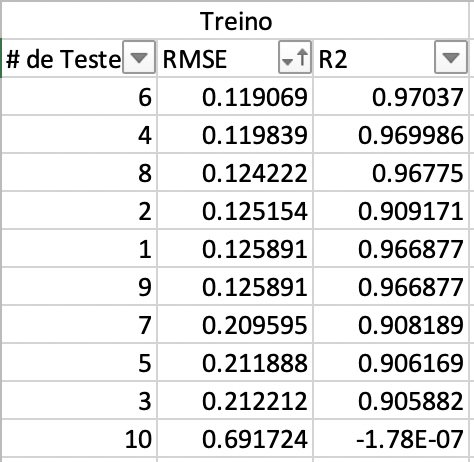


2. Filtro aplicado para os valores do R2 no Treino (de cima para baixo: do melhor resultado obtido para o pior):
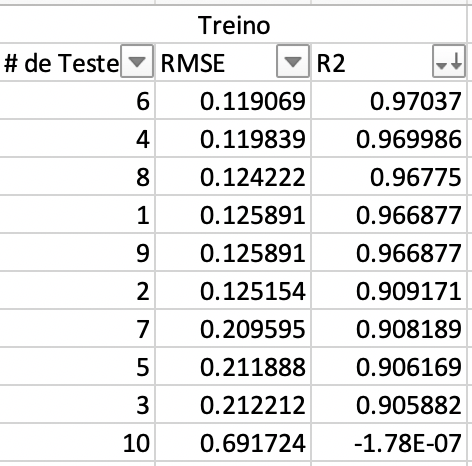


3. Filtro aplicado para os valores do RMSE na Avaliação (de cima para baixo: do melhor resultado obtido para o pior):
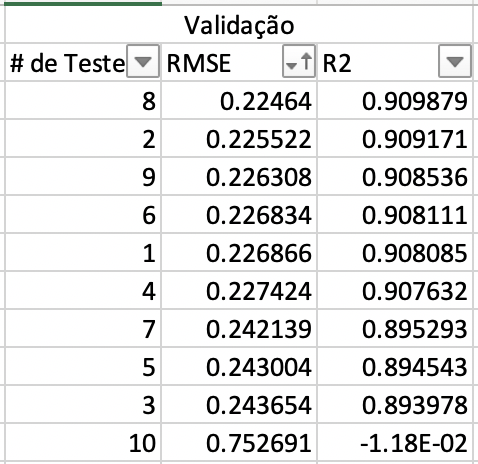


4. Filtro aplicado para os valores do R2 na Avaliação (de cima para baixo: do melhor resultado obtido para o pior):
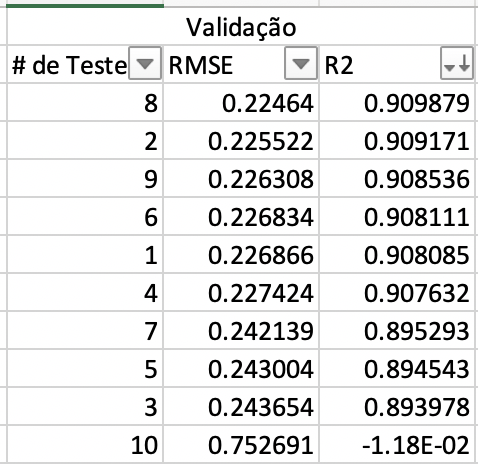


5. Filtro aplicado para os valores do RMSE no OOB (de cima para baixo: do melhor resultado obtido para o pior):
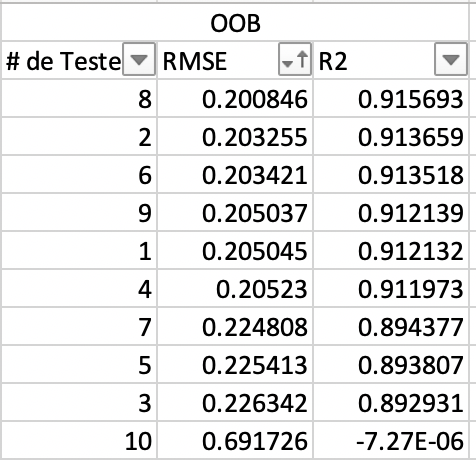

# Interpretação do modelo e engenharia de características

Muito se diz por aí que não é possível interpretar as predições feitas por modelos de aprendizado de máquina, por eles serem complicados e totalmente empíricos. Nossa missão nesta seção é mostrar que essa afirmação é falsa.

Em particular, o modelo de florestas aleatórias pode fornecer muitas informações sobre a natureza das predições e as influências exercidas por cada variável nos resultados. Essas informações podem ser valiosas na importante atividade de [engenharia de características](https://en.wikipedia.org/wiki/Feature_engineering) (mais conhecida pela expressão em inglês *feature engineering*), que consiste na manipulação das variáveis (colunas) do conjunto de dados com o objetivo de melhorar o desempenho dos modelos.

## Importâncias das variáveis

O modelo de florestas aleatórias calcula internamente um ranking de importância das variáveis. Para uma dada variável, quanto maior a diminuição do erro em splits de decisões tomadas com base nessa variável, mais importante ela será. Esse ranking fica armazenado no atributo **feature_importances_** do modelo. 

Na próxima célula, definimos uma função que aceita um modelo e uma lista com os nomes das variáveis, imprime na tela informações relativas ao ranking de importância e retorna um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) com o ranking em si.

In [ ]:
def plotar_importancias(modelo, tags, n=10):
    
    fig, ax = plt.subplots(1,2, figsize = (20,4))

    coefs = []
    abs_coefs = []

    if hasattr(modelo,'coef_'):
        imp = modelo.coef_
    elif hasattr(modelo,'feature_importances_'):
        imp = modelo.feature_importances_
    else:
        print('sorry, nao vai rolar!')
        return

    coefs = (pd.Series(imp, index = tags))
    coefs.plot(use_index=False, ax=ax[0]);
    abs_coefs = (abs(coefs)/(abs(coefs).sum()))
    abs_coefs.sort_values(ascending=False).plot(use_index=False, ax=ax[1],marker='.')

    ax[0].set_title('Importâncias relativas das variáveis')
    ax[1].set_title('Importâncias relativas das variáveis - ordem decrescente')

    abs_coefs_df = pd.DataFrame(np.array(abs_coefs).T,
                                columns = ['Importancias'],
                                index = tags)

    df = abs_coefs_df['Importancias'].sort_values(ascending=False)
    
    print(df.iloc[0:n])
    plt.figure()
    df.iloc[0:n].plot(kind='barh', figsize=(15,0.25*n), legend=False)
    
    return df

Utilizando a função para analisar as importâncias do nosso último modelo:

In [ ]:
imp = plotar_importancias(m, X_validacao.columns,30)

## Removendo variáveis pouco importantes

Variáveis sem importância podem ser descartadas, o que talvez melhore a acurácia do modelo e certamente melhorará o desempenho computacional.

Selecionando, por exemplo, apenas as que apresentam mais que 0,5% importância:

In [ ]:
to_keep = imp[imp>0.005].index
to_keep.shape

In [ ]:
X_treino = X_treino[to_keep]
X_validacao = X_validacao[to_keep]

Eliminamos por volta de 30 variáveis irrelevantes.

## Análise de correlações

Uma análise de correlações é útil para entender as relações entre as variáveis.

A correlação mais utilizada para isso é a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson), que mede o grau de *associação linear* entre as variáveis. Duas variáveis são linearmente associadas se mudanças em uma variável implicam em mudanças diretamente proporcionais na outra variável.

Aqui usaremos a [correlação de Spearman](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_postos_de_Spearman), que mede o grau de *associação monotônica* entre as variáveis. Duas variáveis são monotonicamente associadas se mudanças em uma variável implicam em mudanças no mesmo sentido (crescente ou decrescente) na outra variável. É uma concepção de associação mais genérica do que a de Pearson.

A função abaixo aceita um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) e plota um gráfico do tipo [dendograma](https://en.wikipedia.org/wiki/Dendrogram) mostrando as correlações de Spearman entre as variáveis:

In [ ]:
def dendogram_spearmanr(df, tags):

    import scipy.cluster.hierarchy
    import scipy.stats
    
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = scipy.cluster.hierarchy.distance.squareform(1-corr)
    z = scipy.cluster.hierarchy.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(18,8))
    dendrogram = scipy.cluster.hierarchy.dendrogram(z, labels=tags, orientation='left', leaf_font_size=16)
    plt.show()

In [ ]:
dendogram_spearmanr(X_treino, X_treino.columns)

O gráfico foi gerado por meio de técnicas de [clusterização hierárquica](https://en.wikipedia.org/wiki/Hierarchical_clustering), que separaram as variáveis em grupos de acordo com as correlações entre elas. É evidente que algumas variáveis possuem altíssima correlação, como **GrouserTracks**, **Hydraulics_Flow** e **Coupler_System**, por exemplo. Isso significa que elas possuem a mesma informação e são potencialmente redundantes.

Nas próximas células, removeremos algumas variáveis que o gráfico indica como redundantes e verificaremos o efeito no OOB. Caso o efeito seja pequeno, podemos descartar as variáveis.

## Removendo variáveis redundantes

A função abaixo é definida para agilizar as análises: ela aceita um conjunto X, efetua um treino e retorna o score OOB.

In [ ]:
def get_oob(X):
    m = sklearn.ensemble.RandomForestRegressor(n_estimators=30, min_samples_leaf=5, 
                                               max_features=0.6, n_jobs=-1, max_samples = 100000,
                                               oob_score=True, random_state = 0)
    m.fit(X, y_treino)
    return m.oob_score_

Estabelecendo nossa referência:

In [ ]:
get_oob(X_treino)

Efetuando análises com remoções de uma variável potencialmente redundante por vez:

In [ ]:
for c in ('Grouser_Tracks', 'Hydraulics_Flow', 'Coupler_System',
          'fiModelDesc', 'fiBaseModel','ProductGroupDesc', 'ProductGroup'):
    print(c, get_oob(X_treino.drop(c, axis=1)))

Nenhuma dessas variáveis parece fazer falta, já que o OOB não diminui significativamente!

Efetuando de fato as remoções:

In [ ]:
to_drop = ['ProductGroupDesc', 'fiModelDesc', 'Grouser_Tracks', 'Hydraulics_Flow']
get_oob(X_treino.drop(to_drop, axis=1))

In [ ]:
X_treino = X_treino.drop(to_drop, axis=1)
X_treino.shape

Com esse procedimento, conseguimos diminuir ainda mais o número de variáveis.

***Mão na massa 3!***

* Repita os procedimentos de análise de importância e análise de correlação com os conjuntos de dados [Boston Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) e [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) usados no começo do notebook.

# Análise de importância e correlação do dataset "Boston Housing":

In [ ]:
# Comandos mágicos (começam com %) que não se comunicam com a linguagem Python e sim diretamente com o kernel do Jupyter:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Importando os módulos necessários:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

# Abrindo o dataset Boston Housing:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names) 

# Dendrograma mostrando as correlações de Spearman entre as variáveis:
def dendogram_spearmanr(df, tags):
    import scipy.cluster.hierarchy
    import scipy.stats

    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = scipy.cluster.hierarchy.distance.squareform(1 - corr)
    z = scipy.cluster.hierarchy.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(18, 8))
    dendrogram = scipy.cluster.hierarchy.dendrogram(z, labels=tags, orientation='left', leaf_font_size=16)
    plt.show()

dendogram_spearmanr(X, boston.feature_names)

# Criando a função para a remoção de parâmetros que não modificam o valor do OOB se eliminados:
def get_oob(X):
    m = sklearn.ensemble.RandomForestRegressor(n_estimators=30, min_samples_leaf=5, 
                                               max_features=0.6, n_jobs=-1,
                                               oob_score=True, random_state = 0)
    m.fit(X, boston.target)
    return m.oob_score_

get_oob(X)

In [ ]:
# Removendo os possíveis parâmetros e testando se houve mudança no valor do OOB:
for c in ('NOX', 'CRIM', 'TAX', 'RAD'):
    print(c, get_oob(X.drop(c, axis=1)))



In [ ]:
# Efetuando efetivamente as remoções:
to_drop = ['CRIM', 'TAX']
get_oob(X.drop(to_drop, axis=1))

X = X.drop(to_drop, axis=1)
X.shape

**Análise dos resultados do Dataset "Boston Housing":**

Observa-se que os parâmetros "CRIM" e "TAX" não mudam significativamente o valor do OOB, podendo ser eliminados da equação.

# Análise de importância e correlação do dataset "Diabetes":


In [ ]:
# Comandos mágicos (começam com %) que não se comunicam com a linguagem Python e sim diretamente com o kernel do Jupyter:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Importando os módulos necessários:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

# Abrindo o dataset Boston Housing:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names) 

# Dendrograma mostrando as correlações de Spearman entre as variáveis:
def dendogram_spearmanr(df, tags):
    import scipy.cluster.hierarchy
    import scipy.stats

    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = scipy.cluster.hierarchy.distance.squareform(1 - corr)
    z = scipy.cluster.hierarchy.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(18, 8))
    dendrogram = scipy.cluster.hierarchy.dendrogram(z, labels=tags, orientation='left', leaf_font_size=16)
    plt.show()


dendogram_spearmanr(X, diabetes.feature_names)

# Criando a função para a remoção de parâmetros que não modificam o valor do OOB se eliminados:
def get_oob(X):
    m = sklearn.ensemble.RandomForestRegressor(n_estimators=30, min_samples_leaf=5, 
                                               max_features=0.6, n_jobs=-1,
                                               oob_score=True, random_state = 0)
    m.fit(X, diabetes.target)
    return m.oob_score_

get_oob(X)

In [ ]:
# Removendo os possíveis parâmetros e testando se houve mudança no valor do OOB:
for c in ('bp', 'bmi', 's5', 's4', 's2', 's1'):
    print(c, get_oob(X.drop(c, axis=1)))

In [ ]:
# Efetuando efetivamente as remoções:
to_drop = ['bp', 's5', 's2']
get_oob(X.drop(to_drop, axis=1))

X = X.drop(to_drop, axis=1)
X.shape

**Análise dos resultados do Dataset "Boston Housing":**

Observa-se que os parâmetros "bmi", "s5" e "s2" não mudam significativamente o valor do OOB, podendo ser eliminados da equação.

## Variáveis *dummy* ou *one-hot encoding*

O uso de [variáveis *dummy*](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) ou *one-hot encoding* é uma estratégia diferente para organizar variáveis categóricas. Nessa metodologia, as variáveis são desmembradas em variáveis binárias correspondentes a cada uma de suas categorias. A figura a seguir ilustra bem a situação:

<img src="https://i1.wp.com/thierrymoudiki.github.io/images/2020-02-28/2020-02-28-image1.png?w=578&ssl=1" width="500" height="500"/>

A vantagem dessa representação é que a influência de categorias específicas pode tornar-se mais clara. Em alguns casos, a acurácia do modelo pode aumentar (em modelos de florestas aleatórias, no entanto, isso não é comum). A desvantagem é que a dimensionalidade dos dados (número de colunas) aumenta, diminuindo o desempenho computacional.

A seguir definimos uma nova função para pré-processamento, que utiliza por sua vez a função [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) do [pandas](https://pandas.pydata.org/) para implementar o *one-hot encoding*. Há a especificação de um número máximo de categorias, expressa pelo argumento **max_cats**, que evita o aumento excessivo da dimensionalidade no caso de variáveis de alta cardinalidade. Caso uma variável tenha mais do que **max_cats** categorias, não são geradas variáveis *dummy* a partir dela.

In [ ]:
def pre_process_OHE (df, max_cats = 10):
    
    new_df = pd.DataFrame()
    
    for n,c in df.items():
                
        if pd.api.types.is_numeric_dtype(c):
            # substituindo NaN numericos pelas medianas de cada coluna
            new_df[n] = c.fillna(value=c.median())
        else:
            # interpretando o que nao for numerico como variaveis categoricas 
            new_df[n] = pd.Categorical(c.astype('category').cat.as_ordered())
            # transformando cada categoria em um numero, caso nao va fazer one hot encoding com ela
            if len(c.astype('category').cat.categories) > max_cats:
                new_df[n] = pd.Categorical(new_df[n]).codes+1
    
    # a função pd.get_dummies faz o one-hot encoding
    return pd.get_dummies(new_df)

Dando uma conferida no [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) original, para fins de comparação:

In [ ]:
df_raw

Pré-processando o [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) com *one-hot encoding*:

In [ ]:
df_proc_ohe = pre_process_OHE(df_raw)
df_proc_ohe

Quase triplicamos a quantidade de variáveis!

Agora vamos repetir o processo de treinamento e análise de variáveis com o novo conjunto de dados.

In [ ]:
X, y = df_proc_ohe.drop('SalePrice', axis=1), df_proc_ohe['SalePrice']

n_valid = 12000
n_trn = len(df_proc)-n_valid

X_treino, X_validacao = X[:n_trn].copy(), X[n_trn:].copy()
y_treino, y_validacao = y[:n_trn].copy(), y[n_trn:].copy()

In [ ]:
m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, 
                                           max_features = 0.5, n_jobs=-1, 
                                           oob_score = True, random_state = 0)
%time m.fit(X_treino, y_treino)
display_score(m)

In [ ]:
plotar_importancias(m, X_validacao.columns,30)

Olha que interessante: a categoria **w AC** de Enclosure_EROPS é a mais relevante para a determinação do preço (o que faz sentido, já que **w AC** significa "com ar-condicionado").

## Análise de contribuições

Árvores e florestas podem ser interpretadas! Em particular, é possível entender o *porquê* de uma predição em específico, analisando as decisões que as árvores tomam para chegar a essa predição.

O módulo [treeinterpreter](https://pypi.org/project/treeinterpreter/) serve justamente para isso:

In [ ]:
!pip install treeinterpreter
!pip install waterfallcharts

In [ ]:
from treeinterpreter import treeinterpreter as ti
import waterfall_chart

[treeinterpreter](https://pypi.org/project/treeinterpreter/) decompõe uma predição na soma *bias+contribuições*. O bias é a média da variável predita. As contribuições refletem o quanto cada variável contribui para afastar uma predição em específico dessa média.

As contribuições de cada variável são calculadas por meio dos efeitos na predição dos vários splits que a envolvem. Esse [artigo](http://blog.datadive.net/interpreting-random-forests/) detalha bem a ideia.

Vamos dar uma olhada nas contribuições da primeira linha do conjunto de validação:

In [ ]:
row = X_validacao.values[np.newaxis,0]

prediction, bias, contributions = ti.predict(m, row)

idxs = np.argsort(contributions[0])
[o for o in zip(X_validacao.columns[idxs], X_validacao.iloc[0][idxs], contributions[0][idxs])]

A lista acima está organizada em ordem crescente de contribuições.

Dela podemos inferir que o que mais contribui para diminuir o preço do trator em questão é seu tamanho pequeno (**ProductSize_Mini**) e o que mais contribui para aumentar o preço é o ano de fabricação (1999). O que parece fazer todo sentido.

Uma boa maneira de visualizar essa análise é utilizando um [gráfico do tipo cascata](https://en.wikipedia.org/wiki/Waterfall_chart):

In [ ]:
waterfall_chart.plot(X_validacao.columns, contributions[0], threshold=0.08, 
                     rotation_value=90,formatting='{:,.3f}');

No gráfico acima, cada barra representa a contribuição positiva (barras verdes) ou negativa (barras vermelhas) de cada variável para o desvio em relação à média. A última barra, de cor azul, indica o desvio total da predição em relação à média.

Se você acreditava na falácia de que os modelos de aprendizado de máquina não possibilitavam interpretação de seus resultados, espero que sua opinião tenha mudado agora!!!

***Mão na massa 4!***

* Repita o procedimento de análise de contribuições com os conjuntos de dados [Boston Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) e [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) usados no começo do notebook.

# Análise das contribuições do dataset "Boston Housing":

In [ ]:
# Comandos mágicos (começam com %) que não se comunicam com a linguagem Python e sim diretamente com o kernel do Jupyter:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Importando os módulos necessários:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

# Abrindo o dataset Boston Housing:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names) 

m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, 
                                           max_features = 0.5, n_jobs=-1, 
                                           oob_score = True, random_state = 0)
%time m.fit(X, boston.target)

# Instalando o módulo treeinterpreter visando interpretar as decisões que as árvores tomam para chegar as predições feitas:
!pip install treeinterpreter
!pip install waterfallcharts

from treeinterpreter import treeinterpreter as ti
import waterfall_chart

# Visualizando as contribuições da primeira linha do conjunto de validação:
row = X.values[np.newaxis,0]

prediction, bias, contributions = ti.predict(m, row)

idxs = np.argsort(contributions[0])
[o for o in zip(X.columns[idxs], X.iloc[0][idxs], contributions[0][idxs])]

# Visualizando os resultados acima, plotando um gráfico do tipo cascata:
waterfall_chart.plot(X.columns, contributions[0], threshold=0.08, 
                     rotation_value=90,formatting='{:,.3f}');

**Análise dos resultados do dataset "Boston Housing":**

Observa-se que os parâmetros "RM" e "Other" fornecem uma diminuição (ou um impacto negativo) no valor do desvio em relação à média, enquanto que os outros parâmetros aumentam o valor neto final das contribuições, resultado da soma da contribuição dada por cada parâmetro.

# Análise das contribuições do dataset "Diabetes":

In [ ]:
# Comandos mágicos (começam com %) que não se comunicam com a linguagem Python e sim diretamente com o kernel do Jupyter:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Importando os módulos necessários:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

# Abrindo o dataset Diabetes:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names) 

m = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 3, 
                                           max_features = 0.5, n_jobs=-1, 
                                           oob_score = True, random_state = 0)
%time m.fit(X, diabetes.target)

# Instalando o módulo treeinterpreter visando interpretar as decisões que as árvores tomam para chegar as predições feitas:
!pip install treeinterpreter
!pip install waterfallcharts

from treeinterpreter import treeinterpreter as ti
import waterfall_chart

# Visualizando as contribuições da primeira linha do conjunto de validação:
row = X.values[np.newaxis,0]

prediction, bias, contributions = ti.predict(m, row)

idxs = np.argsort(contributions[0])
[o for o in zip(X.columns[idxs], X.iloc[0][idxs], contributions[0][idxs])]

# Visualizando os resultados acima, plotando um gráfico do tipo cascata:
waterfall_chart.plot(X.columns, contributions[0], threshold=0.08, 
                     rotation_value=90,formatting='{:,.3f}');

**Análise dos resultados do dataset "Diabetes":**

Observa-se que os parâmetros "s6" e "Other" fornecem uma diminuição (ou um impacto negativo) no valor do desvio em relação à média, enquanto que os outros parâmetros aumentam o valor neto final das contribuições, resultado da soma da contribuição dada por cada parâmetro.

## Aspectos temporais

O modelo de florestas aleatórias é ótimo para capturar não-linearidades e representar dados sem estrutura matemática definida. No entanto, ele não consegue efetuar extrapolações e modelar tendências temporais. Um exemplo simples ajuda a ilustrar:

In [ ]:
# criando exemplo simples com tendência linear
N = 30
x = np.arange(N)
y = 2*x

# adicionando ruído
y = y+ 3*np.random.randn(N)

# separando em treino e teste

n = int(N/2)

# se eu nao criar esse novo eixo em x a seguir, o sklearn reclama, 
# pq pra ele a array de dados preditores tem q ter 2 dimensoes:
x = x[:,np.newaxis]   

x_treino, y_treino = x[:n], y[:n]
x_treino, y_treino = x[:n], y[:n]

x_teste, y_teste = x[n:], y[n:]
x_teste, y_teste = x[n:], y[n:]

# especificando modelos

import sklearn.linear_model
import sklearn.neural_network
import sklearn.svm
import sklearn.neighbors

modelos = [sklearn.linear_model.LinearRegression(),
           sklearn.neural_network.MLPRegressor(),
           sklearn.ensemble.RandomForestRegressor(),
           sklearn.neighbors.KNeighborsRegressor(),
           sklearn.svm.SVR()]

# preparando janela do gráfico
fig, ax = plt.subplots(1,5,figsize=(20,3))

# calculando e plotando
for i in range(len(modelos)):
    modelos[i].fit(x_treino, y_treino)
    ax[i].plot(x, y)
    ax[i].plot(x, modelos[i].predict(x),'.')
    ax[i].set_title(modelos[i].__class__.__name__)
    ax[i].axvline(n,ls='--',c='k')

Os dois primeiros modelos, [regressão linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) e [rede neural MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), capturam a tendência linear com bastante clareza. As redes neurais, que serão tema da próxima aula, são bem-sucedidas na extrapolação porque possuem estrutura matemática bem-definida. Essa estrutura possibilita a captura da tendência linear.

O desempenho do modelo de florestas aleatórias é triste. Ocorre sobreajuste no treino e a baixa capacidade de extrapolação é evidente no teste. O motivo é o fato de o modelo não possuir estrutura matemática definida, já que se baseia puramente em partições no conjunto de dados. Isso proporciona flexibilidade para a modelagem, mas o preço a ser pago é justamente essa incapacidade de extrapolação.

O quarto modelo, chamado de [k-vizinhos mais próximos (kNN, k-nearest neighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), também não tem estrutura matemática definida, pois [se baseia puramente nas distâncias entre os pontos](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

O quinto modelo, [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html), baseado em [máquinas de vetores-suporte](https://en.wikipedia.org/wiki/Support_vector_machine), tem estrutura matemática bem-definida, mas é inerentemente não-linear e por isso fracassa miseravelmente.

### Dicas sobre aspectos temporais

Florestas aleatórias não são designadas para modelar tendências temporais, mas isso não significa que tais aplicações sejam impossíveis. No entanto, procedimentos adicionais são necessários para criar boas soluções. Algumas dicas de engenharia de características a respeito:

* adicionar variáveis atrasadas no tempo para modelar autocorrelação (como [aqui](https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/));
* adicionar variáveis que representem derivadas (*delta features*) para modelar tendências (como [aqui](https://www.sciencedirect.com/science/article/pii/S002002551931076X));
* criar variáveis que detalham datas em distintas granularidades (a função [add_datepart](https://docs.fast.ai/tabular.core#add_datepart), da biblioteca [fastai](https://docs.fast.ai/), é ótima para isso).


# Modelo final

Chegou a hora de gerarmos nosso modelo final! Utilizaremos todos os dados para treinar. A métrica de avaliação será o OOB.

In [ ]:
df_final = pre_process(df_raw)

X, y = df_final.drop('SalePrice', axis=1)[to_keep].drop(to_drop, axis=1), df_final['SalePrice']

m = sklearn.ensemble.RandomForestRegressor(min_samples_leaf = 3, 
                                           max_features = 0.5, n_jobs=-1, 
                                           oob_score = True, random_state = 0)
%time m.fit(X, y)
m.oob_score_

O próximo passo natural seria aplicar o modelo final a um conjunto de teste em separado. Nosso exemplo, no entanto, veio de uma competição encerrada do Kaggle que não permite mais submeter o modelo e avaliar o desempenho no conjunto de teste da competição (em algumas competições mais recentes, é possível submeter mesmo após o término, só para fins de verificação de como seria seu desempenho).

Mas lembre-se: em problemas da vida real, separe sempre um conjunto de teste para ser usado apenas na avaliação do modelo final!

É isso! Até a próxima aula, galera!!